# ch5 Tests on one or two mean vectors

## 5.8 Test for additional information

### Example 5.8

In [16]:
import numpy as np
import os
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sas7bdat import SAS7BDAT

In [2]:
data_dir ='C:\\Users\\Kenta\\ProgramScripts\\Rencher_MethodsOfMultivariateAnalysis\\data\\multivariate_analysis - 3rd Ed\\'

In [3]:
# os.getcwd()

In [4]:
# os.listdir(data_dir)

In [5]:
# data_dir + 'T5_1_PSYCH.DAT'

In [6]:
df = pd.read_csv(data_dir + 'T5_1_PSYCH.DAT', sep='\s+', header=None)

In [7]:
df.head()

,0,1,2,3,4
0,1,15,17,24,14
1,1,17,15,32,26
2,1,15,14,29,23
3,1,13,12,10,16
4,1,20,17,26,28


In [9]:
grouped = df.groupby(0)
df1 = grouped.get_group(1)
df2 = grouped.get_group(2)

df1 = df1.drop(0, axis=1)
df2 = df2.drop(0, axis=1)

In [10]:
y1 = df1.values
y2 = df2.values

In [33]:
n1 = len(y1)
n2 = len(y2)

In [12]:
y1a, y1b = np.split(y1, 2, axis=1) 
y2a, y2b = np.split(y2, 2, axis=1) 

In [56]:
# mean
y1_mean = np.mean(y1, axis=0)[np.newaxis]
y2_mean = np.mean(y2, axis=0)[np.newaxis]

y1a_mean = np.mean(y1a, axis=0)[np.newaxis]
y2a_mean = np.mean(y2a, axis=0)[np.newaxis]

y1b_mean = np.mean(y1b, axis=0)[np.newaxis]
y2b_mean = np.mean(y2b, axis=0)[np.newaxis]

In [39]:
np.sum(np.dot(y1a, y1a.T)

520202

In [119]:
Syy**-1

array([[0.1395807 , 0.16536089],
       [0.16536089, 0.06291622]])

In [108]:
S1 = np.dot((y1 - y1_mean).T, (y1- y1_mean)) / (n1-1)
S2 = np.dot((y2 - y2_mean).T, (y2- y2_mean)) / (n2-1)
Spl = ((n1-1)*S1 + (n2-1)*S2) / (n1 + n2 - 2) 

upper, lower = np.split(Spl, 2, axis=0)
Syy, Syx = np.split(upper, 2, axis=1)
Sxy, Sxx = np.split(lower, 2, axis=1)

In [123]:
Syy_inv = np.linalg.inv(Syy)
tmp = np.dot((y1a_mean - y2a_mean), Syy_inv)
tmp = np.dot(tmp, (y1a_mean - y2a_mean).T)
T2p = n1*n2 / (n1+n2) * tmp

In [126]:
T2p

array([[31.01257963]])

In [126]:
T2p

array([[31.01257963]])

In [128]:
Spl_inv = np.linalg.inv(Spl)
tmp = np.dot((y1_mean - y2_mean), Spl_inv)
tmp = np.dot(tmp, (y1_mean - y2_mean).T)
T2pq = n1*n2 / (n1+n2) * tmp

In [129]:
T2pq

array([[97.60149653]])

In [131]:
nu = 62 
p = 2

T = (nu - p) * (T2pq - T2p) / (nu+T2p)

In [132]:
T

array([[42.95478128]])

### それぞれ一つずつ除外

---

## 5.9 profile analysis

### intro

In [14]:
np.random.seed(123)
x = np.arange(1,5)
y = 50 + stats.norm.rvs(size=4)

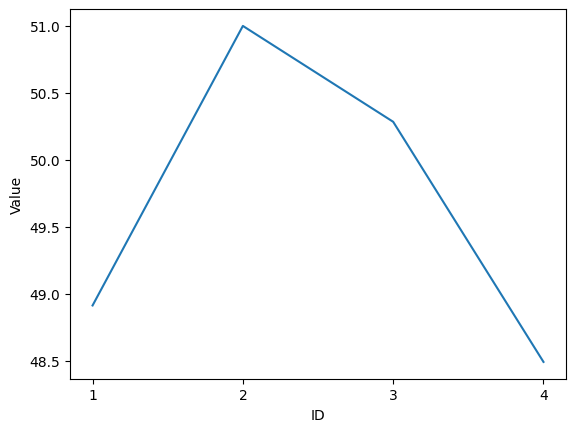

In [23]:
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("ID")
plt.ylabel("Value")
plt.savefig(".\\images\\509_1_profile.png")
plt.show()

In [38]:
x = np.arange(1,5)
y1 = np.array([50, 55, 48, 65])
y2 = y1-10
y3 = np.array([50, 55, 48, 65])
y3[3] = y3[3] + 5
y4 = y3 - 10
y4[3] = y4[3] - 15 

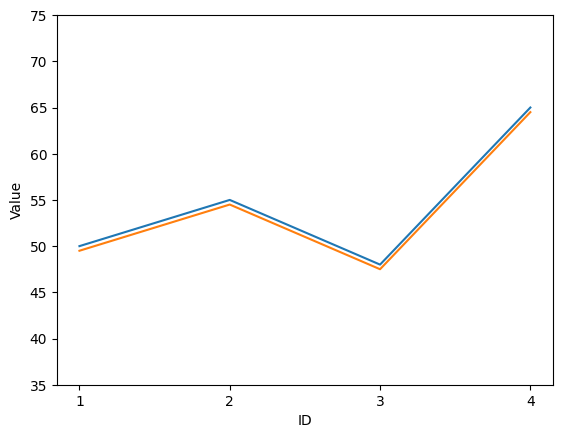

In [43]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x)
plt.ylim(35, 75)
plt.xlabel("ID")
plt.ylabel("Value")
plt.savefig(".\\images\\509_2_profile2.png")
plt.show()

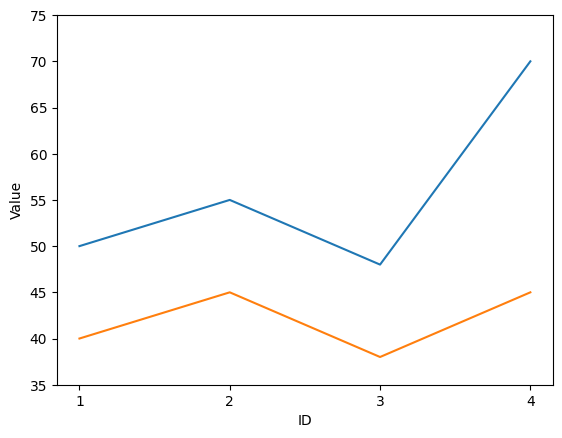

In [40]:
plt.plot(x,y3)
plt.plot(x,y4)
plt.xticks(x)
plt.ylim(35, 75)
plt.xlabel("ID")
plt.ylabel("Value")
plt.savefig(".\\images\\509_3_profile3.png")
plt.show()

In [41]:
x = np.arange(1,5)
y1 = np.array([50, 55, 48, 65])
y2 = y1-0.5

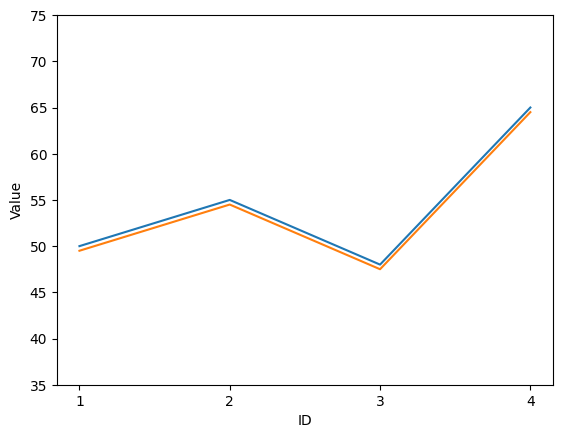

In [44]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x)
plt.ylim(35, 75)
plt.xlabel("ID")
plt.ylabel("Value")
plt.savefig(".\\images\\509_4_profile4.png")
plt.show()

In [58]:
np.random.seed(1)
x = np.arange(1,5)
y1 = 50 + stats.norm.rvs(size=4)*3
y2 = 50 + stats.norm.rvs(size=4)*3

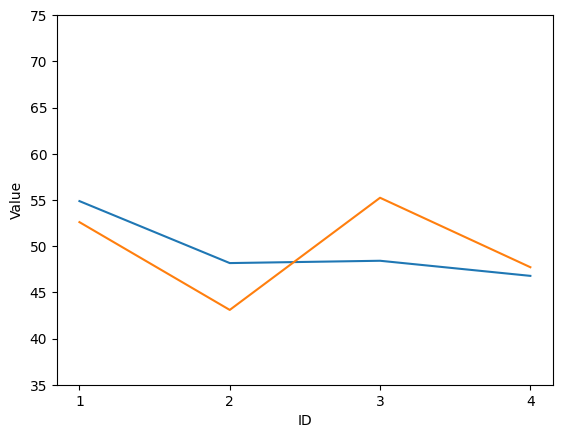

In [59]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x)
plt.ylim(35, 75)
plt.xlabel("ID")
plt.ylabel("Value")
plt.savefig(".\\images\\509_5_profile5.png")
plt.show()

### Example 5.9.2

In [100]:
df = pd.read_csv(data_dir + 'T5_1_PSYCH.DAT', sep='\s+', header=None)

grouped = df.groupby(0)
df1 = grouped.get_group(1)
df2 = grouped.get_group(2)

df1 = df1.drop(0, axis=1)
df2 = df2.drop(0, axis=1)

y1 = df1.values
y2 = df2.values

n1 = len(y1)
n2 = len(y2)

p=4

In [81]:
C = np.array([[-1,1,0,0],
             [0,-1,1,0],
             [0,0,-1,1]])

In [82]:
# mean
y1_mean = np.mean(y1, axis=0)[np.newaxis]
y2_mean = np.mean(y2, axis=0)[np.newaxis]


In [83]:
S1 = np.dot((y1 - y1_mean).T, (y1- y1_mean)) / (n1-1)
S2 = np.dot((y2 - y2_mean).T, (y2- y2_mean)) / (n2-1)
Spl = ((n1-1)*S1 + (n2-1)*S2) / (n1 + n2 - 2) 

In [93]:
Cy1_y2 = np.dot(C, (y1_mean-y2_mean).T)
Cy1_y2

array([[-1.625  ],
       [ 8.53125],
       [-9.71875]])

In [94]:
tmp = np.dot(C, Spl)
CSplC = np.dot(tmp, C.T)
CSplC

array([[ 10.96370968,  -7.04737903,  -1.64415323],
       [ -7.04737903,  28.265625  , -12.73891129],
       [ -1.64415323, -12.73891129,  23.71522177]])

### H01

In [95]:
CSplC_inv = np.linalg.inv(CSplC)
tmp = np.dot((y1_mean-y2_mean), C.T)
tmp = np.dot(tmp, CSplC_inv)
tmp = np.dot(tmp, C)
tmp = np.dot(tmp, (y1_mean-y2_mean).T) 

T2 = n1*n2/(n1+n2) * tmp

In [96]:
T2

array([[74.24036995]])

In [97]:
a = np.dot(CSplC_inv, Cy1_y2)
a

array([[-0.13560855],
       [ 0.10434028],
       [-0.36316463]])

### H02

In [119]:
j=np.ones(p)[np.newaxis]

In [135]:
jy1_y2 = np.dot(j, (y1_mean-y2_mean).T)

jSplj = np.dot(j, Spl)
jSplj = np.dot(jSplj, j.T)

array([[164.27570565]])

In [137]:
t = jy1_y2 / np.sqrt(jSplj * (1/n1 + 1/n2))


array([[5.29569753]])

In [144]:
t

array([[5.29569753]])

In [139]:
y_bar = (n1*y1_mean + n2*y2_mean) / (n1+n2)
y_bar

array([[14.15625 , 14.90625 , 21.921875, 22.34375 ]])

In [145]:
C_y_bar = np.dot(C, y_bar.T)
tmp = np.dot(C_y_bar.T, CSplC_inv)
tmp = np.dot(tmp, C_y_bar)

T2 = (n1+n2)*tmp

In [146]:
T2

array([[254.00376865]])